Maximum time step: 758.06 s
Time step: 360.00 s
Maximum time step: 758.06 s
Time step: 360.00 s


[Text(0, 0.5, '$T_i$ [°C]'), Text(0.5, 1.0, 'Step input: To = -1°C')]

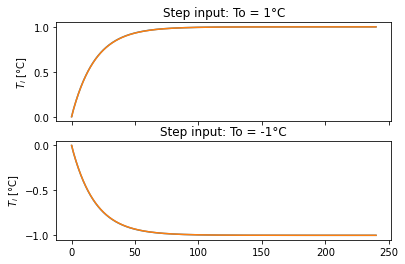

In [1]:
""" 
Partie du code sur la statique, la partie dynamique se trouve sur le code programmedeouf3 mais il y
a un problème sur le produit matriciel donc il n'est pas possible de le mettre dans un fichier méduse.
"""

import numpy as np
import dm4bem
import matplotlib.pyplot as plt
import pandas as pd


# Radiative properties
# --------------------
""" concrete EngToolbox Emissivity Coefficient Materials """
ε_wLW = 0.9     # long wave wall emmisivity
""" grey to dark surface EngToolbox,
    Absorbed Solar Radiation by Surface Color """
α_wSW = 0.2     # absortivity white surface

""" Glass, pyrex EngToolbox Absorbed Solar Radiation bySurface Color """
ε_gLW = 0.9     # long wave glass emmisivity

""" EngToolbox Optical properties of some typical glazing mat
    Window glass """
τ_gSW = 0.83    # short wave glass transmitance

α_gSW = 0.1     # short wave glass absortivity

σ = 5.67e-8     # W/m².K⁴ Stefan-Bolzmann constant
Fwg = 1 / 5     # view factor wall - glass
Tm = 20 + 273   # mean temp for radiative exchange

l=5

wall = {'Conductivity': [1.4, 0.027, 1.4],      # W/m.K
        'Density': [2300, 55, 2500],            # kg/m³
        'Specific heat': [880, 1210, 750],      # J/kg.K
        'Width': [0.2, 0.08, 0.004],            # m
        'Surface': [5 * l**2, 5 * l**2, l**2],  # m²
        'Slice': [4, 2, 1]}                    # number of meshes
wall = pd.DataFrame(wall, index=['Concrete', 'Insulation', 'Glass'])


#Matrix A show the direction of heat flow
A=np.zeros((26,20))

A[0,0]=1
A[1,0]=-1

A[1,1]=1
A[2,1]=-1

A[2,2]=1
A[3,2]=-1

A[3,3]=1
A[4,3]=-1

A[4,4]=1
A[20,4]=-1

A[5,5]=1
A[6,5]=-1

A[6,6]=1
A[7,6]=-1

A[7,7]=1
A[8,7]=-1

A[8,8]=1
A[9,8]=-1

A[9,9]=1
A[21,9]=-1

A[10,10]=1
A[11,10]=-1

A[11,11]=1
A[12,11]=-1

A[12,12]=1
A[22,12]=-1

A[13,13]=1
A[14,13]=-1

A[14,14]=1
A[15,14]=-1

A[15,15]=1
A[23,15]=-1

A[16,16]=1
A[17,16]=-1

A[17,17]=1
A[18,17]=-1

A[18,18]=1
A[24,18]=-1

A[20,19]=1
A[21,19]=1
A[22,19]=1
A[23,19]=1
A[24,19]=1
A[25,19]=1

A2 = np.transpose(A)

Text = 25                       #°C
Tint1 = 18                      #°C
Tint2 = 20                      #°C
lambda_concrete = 1.4
lambda_insulation = 0.027
lambda_glass = 1.4
lambda_wood = 0.1
hi = 4
ho = 10 
Swall = 15
Swindow = 1
Sint = 78
Sdoor = 2
Wglass = 0.01
Wconcrete_ext = 0.2
Wconcrete_int = 0.1
Winsulation = 0.1
Wdoor = 0.05
Dconcrete = 2300
Dinsulation = 55
Dglass = 2500
Dwood = 1400
Cp_concrete = 880
Cp_insulation = 1210
Cp_glass = 750
Cp_wood = 2300
rho_air = 1.3
C_air = 1005
Vair = 75
debVair = 4

G = np.zeros((26,26))

G[0,0] = ho*(Swall - Swindow)
G[1,1] = lambda_concrete * (Swall - Swindow) / Wconcrete_ext
G[2,2] = lambda_concrete * (Swall - Swindow) / Wconcrete_ext
G[3,3] = lambda_insulation * (Swall - Swindow) / Winsulation
G[4,4] = lambda_insulation * (Swall - Swindow) / Winsulation
G[5,5] = ho*Swall
G[6,6] = lambda_concrete * Swall / Wconcrete_ext
G[7,7] = lambda_concrete * Swall / Wconcrete_ext
G[8,8] = lambda_insulation * Swall / Winsulation
G[9,9] = lambda_insulation * Swall / Winsulation
G[10,10] = hi * Sint
G[11,11] = lambda_concrete * Sint / Wconcrete_int
G[12,12] = lambda_concrete * Sint / Wconcrete_int
G[13,13] = ho * Swindow
G[14,14] = lambda_glass * Swindow / Wglass
G[15,15] = lambda_glass * Swindow / Wglass
G[16,16] = hi * Sdoor
G[17,17] = lambda_wood * Sdoor / Wdoor
G[18,18] = lambda_wood * Sdoor / Wdoor
G[19,19] = rho_air * debVair * C_air / 3600
G[20,20] = hi * (Swall - Swindow)
G[21,21] = hi * Swall
G[22,22] = hi * Sint
G[23,23] = hi * Swindow
G[24,24] = hi * Sdoor
G[25,25] = 0.00001

C = np.zeros((20,20))
C[1,1] = Dconcrete * Cp_concrete * (Swall - Swindow) * Wconcrete_ext
C[3,3] = Dinsulation * Cp_insulation * (Swall - Swindow) * Winsulation
C[6,6] = Dconcrete * Cp_concrete * Swall * Wconcrete_ext
C[8,8] = Dinsulation * Cp_insulation * Swall * Winsulation
C[11,11] = Dconcrete * Cp_concrete * Sint * Wconcrete_int
C[14,14] = Dglass * Cp_glass * Swindow * Wglass
C[17,17] = Dwood * Cp_wood * Sdoor * Wdoor
C[19,19] = rho_air * C_air * Vair


# steady-state

f = np.zeros(20)
f[0] = 1
f[4] = 1
f[5] = 1
f[9] = 1
f[10] = 1
f[12] = 1
f[13] = 1
f[15] = 1
f[16] = 1
f[18] = 1
f[19] = 1

b = np.zeros(26)
b[0] = 1
b[5] = 1
b[10] = 1
b[13] = 1
b[16] = 1
b[19] = 1
b[25] = 1


ytc = np.linalg.inv(A2 @ G @ A) @ (A2 @ G @ b + f)
y = np.zeros(20)
y[19]=1
u = np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])

[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)
yss = (-Cs @ np.linalg.inv(As) @ Bs + Ds) @ u


u = np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])

# Maximum time-step
dtmax = min(-2. / np.linalg.eig(As)[0])
print(f'Maximum time step: {dtmax:.2f} s')
dt = 360
print(f'Time step: {dt:.2f} s')



# Step response
# -------------
duration = 3600 * 24 * 10        # [s]
# number of steps
n = int(np.floor(duration / dt))

t = np.arange(0, n * dt, dt)    # time

# Vectors of state and input (in time)
n_tC = As.shape[0]              # no of state variables (temps with capacity)

# u = [To To To Tsp Phio Phii Qaux Phia]
u = np.zeros([18, n])
u[0:7, :] = np.ones([7, n])



# initial values for temperatures obtained by explicit and implicit Euler
temp_exp = np.zeros([n_tC, t.shape[0]])
temp_imp = np.zeros([n_tC, t.shape[0]])

I = np.eye(n_tC)
for k in range(n - 1):
    temp_exp[:, k + 1] = (I + dt * As) @\
        temp_exp[:, k] + dt * Bs @ u[:, k]
    temp_imp[:, k + 1] = np.linalg.inv(I - dt * As) @\
        (temp_imp[:, k] + dt * Bs @ u[:, k])

y_exp = Cs @ temp_exp + Ds @  u
y_imp = Cs @ temp_imp + Ds @  u

fig, axs = plt.subplots(2,1)
axs[0].plot(t / 3600, y_exp.T, t / 3600, y_imp.T)
axs[0].set(ylabel='$T_i$ [°C]', title='Step input: To = 1°C')

#On regarde avec une diminution de température ?

f = -f
b = -b

ytc = np.linalg.inv(A2 @ G @ A) @ (A2 @ G @ b + f)
y = np.zeros(20)
y[19]=-1
u = np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])

[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)


u = np.hstack([b[np.nonzero(b)], f[np.nonzero(f)]])

# Maximum time-step
dtmax = min(-2. / np.linalg.eig(As)[0])
print(f'Maximum time step: {dtmax:.2f} s')
dt = 360
print(f'Time step: {dt:.2f} s')


# Step response
# -------------
duration = 3600 * 24 * 10        # [s]
# number of steps
n = int(np.floor(duration / dt))

t = np.arange(0, n * dt, dt)    # time

# Vectors of state and input (in time)
n_tC = As.shape[0]              # no of state variables (temps with capacity)

# u = [To To To Tsp Phio Phii Qaux Phia]
u = np.zeros([18, n])
u[0:7, :] = np.ones([7, n])



# initial values for temperatures obtained by explicit and implicit Euler
temp_exp = np.zeros([n_tC, t.shape[0]])
temp_imp = np.zeros([n_tC, t.shape[0]])

I = np.eye(n_tC)
for k in range(n - 1):
    temp_exp[:, k + 1] = (I + dt * As) @\
        temp_exp[:, k] + dt * Bs @ u[:, k]
    temp_imp[:, k + 1] = np.linalg.inv(I - dt * As) @\
        (temp_imp[:, k] + dt * Bs @ u[:, k])

y_exp = Cs @ temp_exp + Ds @  u
y_imp = Cs @ temp_imp + Ds @  u

axs[0].set_xticklabels([])
axs[1].plot(t / 3600, y_exp.T, t / 3600, y_imp.T)
axs[1].set(ylabel='$T_i$ [°C]', title='Step input: To = -1°C')
